# POLO Ranking Model Score Analysis

In [1]:
import pandas as pd
import os

### Config - change the score_date to the appropriate value

In [15]:
score_date = '2020-02-25'
analysis_dir = 'U:\\Source Files\\Data Analytics\\Data-Science\\Data\\Polo_Rank_Model\\Analysis\\{}\\'.format(score_date)
print(analysis_dir)

if not os.path.exists(analysis_dir):
    os.mkdir(analysis_dir)

U:\Source Files\Data Analytics\Data-Science\Data\Polo_Rank_Model\Analysis\2020-02-25\


### Read data

In [3]:
df = pd.read_csv('C:\\Users\\glappe\\Documents\\udrive\\Data\\Polo_Rank_Model\\Polo_Addr_Rank_Scored_PPD_DPC_Pop.csv', 
                 index_col=0)

In [4]:
df.head()

,LIC_STATE_MATCH,PCP,ENT_COMM_SRC_CAT_CODE,ENT_COMM_COMM_TYPE,ADDR_AGE_YRS,YOP_YRS,DOCTOR_AGE_YRS,PPD_ADDRESS_TYPE,PPD_REGION,PPD_DIVISION,...,POST_CITY_CD,POST_STATE_CD,POST_ZIP,ENT_COMM_BEGIN_DT,ENT_COMM_END_DT,ENT_COMM_COMM_ID,ENT_COMM_ENTITY_ID,PRED_CLASS,PRED_PROBABILITY,RANK_ROUND
0,0,1,PPA,OF,18.832877,20.208219,47.224658,1,3,5,...,CHARLOTTE,NC,28203,2001-05-17 00:00:00.000000,2020-03-12 09:35:34.033300,2886432,1234606,0,0.314223,3
1,0,1,GROUP,GROUP,16.002740,20.208219,47.224658,1,3,5,...,ASHEVILLE,NC,28805,2004-03-15 00:00:00.000000,2020-03-12 09:35:34.033300,6535763,1234606,0,0.348911,3
2,0,1,DEA,OF,11.317808,20.208219,47.224658,1,3,5,...,ASHEVILLE,NC,28805,2008-11-19 00:00:00.000000,2020-03-12 09:35:34.033300,11727862,1234606,0,0.332432,3
3,1,1,NPI,OF,4.452055,20.208219,60.235616,2,4,8,...,SUN CITY WEST,AZ,85375,2015-09-30 00:00:00.000000,2020-03-12 09:35:34.033300,15446117,1234619,1,0.953620,10
4,1,1,DEA,OF,1.495890,20.208219,47.224658,2,3,7,...,NEW ORLEANS,LA,70115,2018-09-13 00:00:00.000000,2020-03-12 09:35:34.033300,22635755,1234632,1,0.911685,9


In [5]:
df.shape

(915671, 47)

In [6]:
from matplotlib import pyplot as plt

(array([ 14257.,   9687.,   8485.,  12814.,  21079.,  15498.,  15305.,
         12161.,  11176.,  13967.,  16376.,  26213.,  37776.,  45296.,
         51904.,  72829.,  76464.,  88733., 148003., 217648.]),
 array([1.77289440e-05, 4.99717995e-02, 9.99258700e-02, 1.49879941e-01,
        1.99834011e-01, 2.49788082e-01, 2.99742152e-01, 3.49696223e-01,
        3.99650293e-01, 4.49604364e-01, 4.99558434e-01, 5.49512505e-01,
        5.99466576e-01, 6.49420646e-01, 6.99374717e-01, 7.49328787e-01,
        7.99282858e-01, 8.49236928e-01, 8.99190999e-01, 9.49145069e-01,
        9.99099140e-01]),
 <a list of 20 Patch objects>)

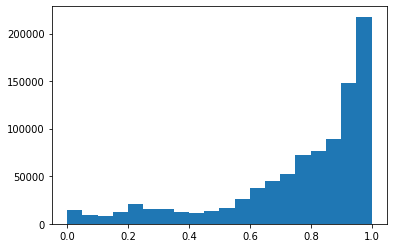

In [7]:
plt.hist(df['PRED_PROBABILITY'], bins=20)

In [8]:
hist_df = df.groupby(['PPD_ME', 'ENT_COMM_COMM_ID'])['PRED_PROBABILITY'].mean().reset_index()
hist_df.head()

,PPD_ME,ENT_COMM_COMM_ID,PRED_PROBABILITY
0,102000030,2886432,0.314223
1,102000030,6535763,0.348911
2,102000030,11727862,0.332432
3,102000048,15446117,0.953620
4,102000056,22635755,0.911685


In [9]:
from math import floor

In [80]:
hist_df['PRED_BIN'] = hist_df['PRED_PROBABILITY'].apply(lambda x: floor(x/.05)*.05 + .05)

In [83]:
hist = hist_df.groupby('PRED_BIN').size().reset_index().rename(columns={0:'COUNT'})
hist

,PRED_BIN,COUNT
0,0.05,14161
1,0.10,9614
2,0.15,8456
3,0.20,12678
4,0.25,20880
5,0.30,15348
6,0.35,15079
7,0.40,11934
8,0.45,11209
9,0.50,13581


In [85]:
hist['PROPORTION'] = hist['COUNT'] / hist['COUNT'].sum()
hist

,PRED_BIN,COUNT,PROPORTION
0,0.05,14161,0.015968
1,0.10,9614,0.010841
2,0.15,8456,0.009535
3,0.20,12678,0.014296
4,0.25,20880,0.023545
5,0.30,15348,0.017307
6,0.35,15079,0.017003
7,0.40,11934,0.013457
8,0.45,11209,0.012640
9,0.50,13581,0.015314


In [86]:
hist.to_csv(analysis_dir + 'Population_Address_Quality_Hist.csv', index=False)

### Mean Pred Probability by Source

In [87]:
source_scores_counts_df = pd.merge(df.groupby('ENT_COMM_SRC_CAT_CODE')['PRED_PROBABILITY'].mean().reset_index(),
                                  df.groupby('ENT_COMM_SRC_CAT_CODE').size().reset_index(),
                                  on='ENT_COMM_SRC_CAT_CODE',
                                  how='inner').rename(columns={0:'COUNT'})
source_scores_counts_df['PROPORTION'] = source_scores_counts_df['COUNT'] / source_scores_counts_df['COUNT'].sum()
source_scores_counts_df

,ENT_COMM_SRC_CAT_CODE,PRED_PROBABILITY,COUNT,PROPORTION
0,ACS,0.742946,41347,0.045155
1,ACXIOMLODE,0.728032,145,0.000158
2,ACXIOMNCOA,0.756841,6549,0.007152
3,ACXIOMPLUS,0.810635,2,0.000002
4,ADDR-VER,0.770382,125,0.000137
5,ADMIT-HOS,0.454261,5897,0.006440
6,ADVR,0.525816,13,0.000014
7,AFFIL-GRP,0.741470,10217,0.011158
8,AMA-ORG,0.730507,1138,0.001243
9,AMC,0.845105,3686,0.004025


In [88]:
source_scores_counts_df.to_csv(analysis_dir + 'source_scores_counts.csv', index=False)

In [65]:
df.dtypes

LIC_STATE_MATCH              int64
PCP                          int64
ENT_COMM_SRC_CAT_CODE       object
ENT_COMM_COMM_TYPE          object
ADDR_AGE_YRS               float64
YOP_YRS                    float64
DOCTOR_AGE_YRS             float64
PPD_ADDRESS_TYPE             int64
PPD_REGION                   int64
PPD_DIVISION                 int64
PPD_GROUP                    int64
PPD_MSA_POPULATION_SIZE     object
PPD_MD_DO_CODE               int64
PPD_MICRO_METRO_IND          int64
PPD_GENDER                   int64
PPD_TOP_CD                   int64
PPD_PE_CD                    int64
PPD_PRIM_SPEC_CD            object
PPD_POLO_STATE              object
HIST_ENT_ID_ADDR_COUNT       int64
HIST_ENT_ALL_ADDR_COUNT      int64
CURR_ENT_ID_ADDR_COUNT       int64
CURR_ENT_ALL_ADDR_COUNT      int64
CURR_USG_ALL_ADDR_COUNT    float64
PPD_ME                       int64
PPD_FIRST_NAME              object
PPD_MIDDLE_NAME             object
PPD_LAST_NAME               object
PPD_SUFFIX          

In [66]:
df['ADDR_AGE_BIN'] = df['ADDR_AGE_YRS'].apply(lambda x: floor(x/5)*5 + 5)

In [89]:
addr_ages_scores_df = pd.merge(df.groupby('ADDR_AGE_BIN')['PRED_PROBABILITY'].mean().reset_index(),
                               df.groupby('ADDR_AGE_BIN').size().reset_index(),
                               on='ADDR_AGE_BIN',
                               how='inner').rename(columns={0:'COUNT'})
addr_ages_scores_df['PROPORTION'] = addr_ages_scores_df['COUNT'] / addr_ages_scores_df['COUNT'].sum()
addr_ages_scores_df

,ADDR_AGE_BIN,PRED_PROBABILITY,COUNT,PROPORTION
0,5,0.839749,339034,0.370257
1,10,0.714735,299173,0.326725
2,15,0.708611,174088,0.190121
3,20,0.703223,69202,0.075575
4,25,0.739399,14161,0.015465
5,30,0.759525,7601,0.008301
6,35,0.744343,4576,0.004997
7,40,0.742251,1962,0.002143
8,45,0.794747,983,0.001074
9,50,0.805115,361,0.000394


In [90]:
addr_ages_scores_df.to_csv(analysis_dir + 'addr_ages_scores.csv', index=False)

In [91]:
df['YOP_BIN'] = df['YOP_YRS'].apply(lambda x: floor(x/5)*5 + 5)
yop_scores_df = pd.merge(df.groupby('YOP_BIN')['PRED_PROBABILITY'].mean().reset_index(),
                               df.groupby('YOP_BIN').size().reset_index(),
                               on='YOP_BIN',
                               how='inner').rename(columns={0:'COUNT'})
yop_scores_df['PROPORTION'] = yop_scores_df['COUNT'] / yop_scores_df['COUNT'].sum()

yop_scores_df

,YOP_BIN,PRED_PROBABILITY,COUNT,PROPORTION
0,5,0.736610,3384,0.003696
1,10,0.791389,54108,0.059091
2,15,0.790669,83537,0.091230
3,20,0.758175,119645,0.130664
4,25,0.753239,133024,0.145275
5,30,0.753003,127433,0.139169
6,35,0.755335,127976,0.139762
7,40,0.754628,117758,0.128603
8,45,0.747191,79694,0.087033
9,50,0.763248,41904,0.045763


In [92]:
yop_scores_df.to_csv(analysis_dir + 'yop_scores_counts.csv', index=False)

   ### Mean quality score by specialty

In [93]:
specialty_counts_scores_df = pd.merge(df.groupby('PPD_PRIM_SPEC_CD').size().reset_index(), 
                                      df.groupby('PPD_PRIM_SPEC_CD')['PRED_PROBABILITY'].mean().reset_index(),
                                      on='PPD_PRIM_SPEC_CD',
                                      how='inner').rename(columns={0: 'COUNT'}).sort_values(by='PRED_PROBABILITY', ascending=False).reset_index(drop=True)
specialty_counts_scores_df['PROPORTION'] = specialty_counts_scores_df['COUNT'] / specialty_counts_scores_df['COUNT'].sum()
specialty_counts_scores_df

,PPD_PRIM_SPEC_CD,COUNT,PRED_PROBABILITY,PROPORTION
0,SMA,4,0.982903,0.000004
1,CMG,2,0.981291,0.000002
2,IRD,5,0.980921,0.000005
3,SMO,1,0.946777,0.000001
4,HPP,5,0.932082,0.000005
...,...,...,...,...
253,PSH,8,0.606148,0.000009
254,RP,2,0.553994,0.000002
255,PHM,3,0.548426,0.000003
256,PLI,2,0.462271,0.000002


In [94]:
specialty_counts_scores_df.to_csv(analysis_dir + 'specialty_counts_scores.csv', index=False)

In [96]:
df['PPD_ME'].drop_duplicates().shape[0]

624847

In [97]:
df['ENT_COMM_COMM_ID'].drop_duplicates().shape[0]

524705

In [98]:
df.shape[0]

915671

### Address Count Per Physician - Hist

In [13]:
addr_count_freq_hist = df[['PPD_ME', 'ENT_COMM_COMM_ID']].drop_duplicates().groupby('PPD_ME').size().reset_index().rename(columns={0:'COUNT'}).groupby('COUNT').size().reset_index().rename(columns={0:'FREQUENCY'})
addr_count_freq_hist

,COUNT,FREQUENCY
0,1,405849
1,2,177395
2,3,40259
3,4,1318
4,5,24
5,6,1
6,7,1


In [17]:
addr_count_freq_hist.to_csv(analysis_dir + 'addr_count_freq_hist.csv')

In [2]:
input_old = pd.read_csv('U:\\Source Files\\Data Analytics\\Data-Science\\Data\\Polo_Rank_Model\\_Archived\\2019-10-22_PPD_20191012_Polo_Addr_Rank_Input_Data.csv',
                        index_col=0)

In [7]:
input_old.head()

,addr_age_yrs,curr_ent_id_addr_count,curr_ent_all_addr_count,curr_usg_all_addr_count,lic_state_match_0,lic_state_match_1,ent_comm_src_cat_code_ADMIT-HOS,ent_comm_src_cat_code_ECF-CNVRSN,ent_comm_src_cat_code_GROUP,ent_comm_src_cat_code_PHNSURV,ent_comm_src_cat_code_PHONE-CALL,ent_comm_src_cat_code_SCHL-HOSP,ent_comm_comm_type_GROUP,ent_comm_comm_type_OF,ppd_pe_cd_11,ppd_pe_cd_13,ppd_pe_cd_30,ppd_pe_cd_110
0,15.613699,1,9,13.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
1,4.063014,1,30,100.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,12.304110,2,31,36.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
4,2.068493,2,31,36.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5,8.109589,1,919,1470.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [4]:
input_new = pd.read_csv('C:\\Users\\glappe\\Documents\\udrive\\Data\\Polo_Rank_Model\\_Archived\\2020-03-06_PPD_20200222_Polo_Addr_Rank_Input_Data.csv',
                        index_col=0)

In [8]:
input_new.head()

,addr_age_yrs,curr_ent_id_addr_count,curr_ent_all_addr_count,curr_usg_all_addr_count,lic_state_match_0,lic_state_match_1,ent_comm_src_cat_code_ADMIT-HOS,ent_comm_src_cat_code_ECF-CNVRSN,ent_comm_src_cat_code_GROUP,ent_comm_src_cat_code_PHNSURV,ent_comm_src_cat_code_PHONE-CALL,ent_comm_src_cat_code_SCHL-HOSP,ent_comm_comm_type_GROUP,ent_comm_comm_type_OF,ppd_pe_cd_11,ppd_pe_cd_13,ppd_pe_cd_30,ppd_pe_cd_110
0,15.986301,1,9,0.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,4.435616,1,31,0.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,12.676712,2,31,0.0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
4,2.441096,2,31,0.0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5,8.482192,1,917,1.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


(array([524021.,  24398.,  15643.,   5991.,   3722.,   1631.,    768.,
          2020.,      0.,   2587.]),
 array([1.0000e+00, 4.0380e+02, 8.0660e+02, 1.2094e+03, 1.6122e+03,
        2.0150e+03, 2.4178e+03, 2.8206e+03, 3.2234e+03, 3.6262e+03,
        4.0290e+03]),
 <a list of 10 Patch objects>)

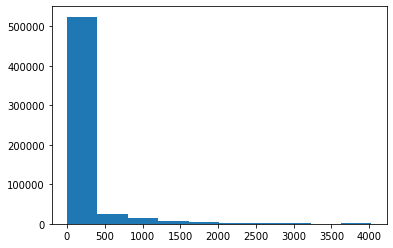

In [17]:
plt.hist(input_old['curr_usg_all_addr_count'].values, bins=10)

(array([5.65523e+05, 1.05430e+04, 4.57500e+03, 7.40000e+02, 3.00000e+01,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 2.50000e+01, 2.00000e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

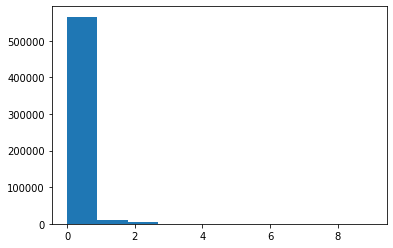

In [18]:
plt.hist(input_new['curr_usg_all_addr_count'].values, bins=10)

In [19]:
df = pd.read_csv('C:\\Users\\glappe\\Documents\\udrive\\Data\\Polo_Rank_Model\\_Archived\\entity_addr_df.csv', 
                 index_col=0)

C:\Users\glappe\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\glappe\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [20]:
df

,ent_comm_entity_id,ent_comm_comm_type,ent_comm_begin_dt,ent_comm_comm_id,ent_comm_end_dt,ent_comm_src_cat_code,post_comm_id,post_addr_line2,post_addr_line1,post_addr_line0,post_city_cd,post_state_cd,post_zip,post_plus4,ent_st_num,ent_addr_key
0,13422847,OF,1999/03/20,5833370,2003/02/05,ROSTER,5833370,5567 N MEADOWS BLVD,NaN,NaN,COLUMBUS,OH,43229,4180,5567,5567-43229
3,13429932,OF,1999/03/20,5833382,2001/09/02,ROSTER,5833382,20066 FAIRWAY DR,NaN,NaN,GROSSE PT WDS,MI,48236,2437,20066,20066-48236
7,13487379,OF,1999/03/20,5833560,2003/02/05,ROSTER,5833560,3 HIGHLAND CV,NaN,NaN,BIG SPRING,TX,79720,6634,3,3-79720
11,13489147,OF,1999/03/20,5833564,2000/07/08,OBSOLETE,5833564,2001 NORTH OREGON STREET,NaN,NaN,EL PASO,TX,79902,NaN,2001,2001-79902
12,13490694,OF,1999/03/20,5833568,2001/12/06,ROSTER,5833568,15 CREEKVIEW LN,NaN,NaN,DURHAM,NC,27705,5581,15,15-27705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28791668,28261177,OF,2020/02/21,24353848,NaN,ACS,24353848,101 RUE FONTAINE,# 1,NaN,LAFAYETTE,LA,70508,5744,101,101-70508
28791669,28659432,OF,2020/02/21,24353851,NaN,ACS,24353851,237 N 2ND ST,NaN,NaN,EUNICE,LA,70535,3337,237,237-70535
28791745,6728939,OF,2020/02/23,24357781,NaN,PHNSURV,24357781,4745 OGLETOWN STANTON RD,STE 217 # 1,NaN,NEWARK,DE,19713,2074,4745,4745-19713
28791746,11851342,OF,2020/02/23,24357865,NaN,PHNSURV,24357865,11011 MERIDIAN AVE N,NaN,NaN,BITTER LAKE,WA,98133,8967,11011,11011-98133


In [21]:
df.dtypes

ent_comm_entity_id        int64
ent_comm_comm_type       object
ent_comm_begin_dt        object
ent_comm_comm_id          int64
ent_comm_end_dt          object
ent_comm_src_cat_code    object
post_comm_id              int64
post_addr_line2          object
post_addr_line1          object
post_addr_line0          object
post_city_cd             object
post_state_cd            object
post_zip                 object
post_plus4               object
ent_st_num               object
ent_addr_key             object
dtype: object

In [22]:
df['post_comm_id'].value_counts()

726067      1703
12155471    1396
13838502    1201
8272393     1154
15622448     964
            ... 
7828478        1
4754433        1
4764678        1
4772874        1
2436561        1
Name: post_comm_id, Length: 1566651, dtype: int64

In [25]:
df.loc[28791669, 'ent_comm_end_dt']

nan

In [26]:
curr_df = df[df['ent_comm_end_dt'].isna()]
curr_df['post_comm_id'].value_counts()

726067      1695
939674       736
12155471     720
13838502     622
13814716     452
            ... 
19879126       1
8332504        1
6229213        1
24044768       1
11534336       1
Name: post_comm_id, Length: 469918, dtype: int64

In [27]:
curr_df['ent_addr_key'].value_counts()

200-55905     4786
9500-44195    2184
1500-48109    2106
55-02114      1974
330-02215     1799
              ... 
870-93230        1
550-33432        1
517-70583        1
1426-43545       1
932-85937        1
Name: ent_addr_key, Length: 160180, dtype: int64